In [49]:
# Load the data
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
from SpectroDataset import SpectroDataset
sp = SpectroDataset(None, None, None)
sp.load_data_map('/workspace/extension/fancy.pkl')

In [40]:
from Autoencoder import AutoEncoder
num_channels = 2

model = AutoEncoder(input_channels=num_channels, out_channels=num_channels).cuda()

In [44]:
import torch
checkpoint = torch.load('/workspace/extension/unet/model_checkpoints/model_0.pt')

In [46]:
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [48]:
model.eval()
''

''

In [138]:
single_element = sp[0]

In [154]:
mono, label, right, left = single_element
orig = mono
label

'90'

In [155]:
# Conver to tensor
mono = torch.from_numpy(mono).cuda()
mono.shape

torch.Size([401, 501])

In [156]:
mono = mono.unsqueeze(0)
mono.shape

torch.Size([1, 401, 501])

In [157]:
mono = torch.view_as_real(mono)
mono.shape

torch.Size([1, 401, 501, 2])

In [158]:
# Convert label to tuple
label = '90'
label = (float(label),)
print(label)
print(type(label))

(90.0,)
<class 'tuple'>


In [159]:
# Generate from model
print(type(mono))

output = model(mono, label)
output = output.contiguous()

<class 'torch.Tensor'>


In [160]:
output.shape

torch.Size([1, 400, 500, 2])

In [161]:
output = output.squeeze(0)
output.shape

torch.Size([400, 500, 2])

In [162]:
output = torch.view_as_complex(output)
output.shape

torch.Size([400, 500])

In [163]:
import librosa
import numpy as np

In [164]:
# Show first five lines of output
print(output[0:5, 0])

tensor([0.0051+0.0050j, 0.0062-0.0010j, 0.0051+0.0004j, 0.0052-0.0002j,
        0.0050+0.0005j], device='cuda:0', grad_fn=<SelectBackward0>)


In [165]:
output = output.cpu().detach().numpy()

In [166]:
print(output[0:5, 0])

[0.00513587+0.00499523j 0.0062129 -0.00099212j 0.00510491+0.00043606j
 0.00523037-0.00016533j 0.00502612+0.00053716j]


/tmp/ipykernel_1029/248800207.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(output, sr=32000, x_axis='time', y_axis='log')


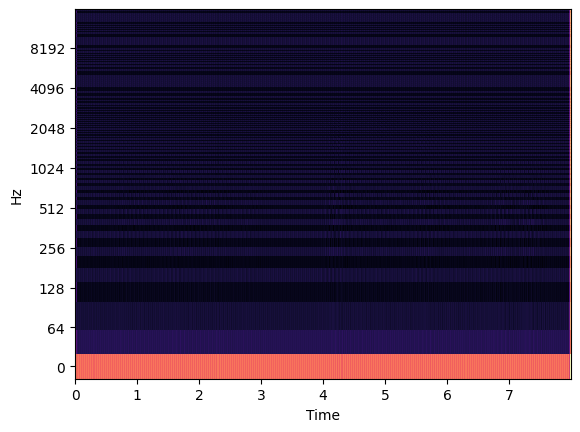

In [170]:
librosa.display.specshow(output, sr=32000, x_axis='time', y_axis='log')

In [168]:
print(orig[0:5, 0])

[ 0.00934297+0.j         -0.01030917+0.01676712j  0.01284514-0.05477672j
  0.04071074+0.10329349j -0.11926603-0.09469341j]


In [169]:
print(right[0:5, 0])

[-0.00735782+0.j         -0.05492159-0.04122766j  0.09160624-0.04045342j
 -0.02968136+0.04956819j  0.12423372-0.04524084j]


In [27]:
# Load the data
import sys
sys.path.append('/workspace/fourth_year_project/Freqency Domain/')
from SpectroDataset import SpectroDataset
sp = SpectroDataset(None, None, None)
sp.load_data_map('/workspace/extension/fancy_tiny.pkl')

In [28]:
mono, label, right, left, orig = sp[0]

torch.Size([2, 400, 500])
tensor([ 9.3430e-03,  9.6695e-02, -1.1209e-01,  7.9235e-02, -6.3714e-02,
         8.2019e-02,  7.9061e-03, -8.2960e-02,  1.4944e-01, -1.3018e-03,
        -1.3215e-01,  2.1295e-01, -1.1224e-01, -9.7537e-03,  2.7107e-02,
         2.2907e-02, -6.6175e-02, -7.4377e-03,  7.3548e-02, -1.2367e-01,
        -5.4419e-02,  1.3626e-01, -9.3980e-02, -1.1310e-01,  2.1687e-02,
         2.3236e-01, -1.2582e-01,  2.1611e-02,  9.5033e-02, -1.8006e-01,
         1.1159e-01, -6.6512e-02,  2.9001e-02, -8.8402e-02,  1.5624e-02,
        -4.5757e-02,  9.6033e-02, -1.0769e-01, -9.2236e-03,  1.4559e-01,
        -1.0243e-01, -2.3499e-02,  1.1875e-01, -5.0736e-02, -8.0629e-02,
         5.8349e-02, -1.3923e-01, -1.8614e-02, -1.5531e-01,  6.3947e-02,
        -4.0949e-03, -2.6289e-02,  4.8118e-02,  7.9210e-02,  6.5579e-02,
        -6.7279e-02,  2.2847e-02, -1.0813e-03,  1.9815e-03, -6.9354e-02,
         1.7477e-01, -1.2756e-01,  1.3304e-01,  1.3403e-01, -4.0671e-01,
         1.0693e-01,  2.1

/tmp/ipykernel_3543/2975103317.py:10: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(mono, sr=32000, x_axis='time', y_axis='log')


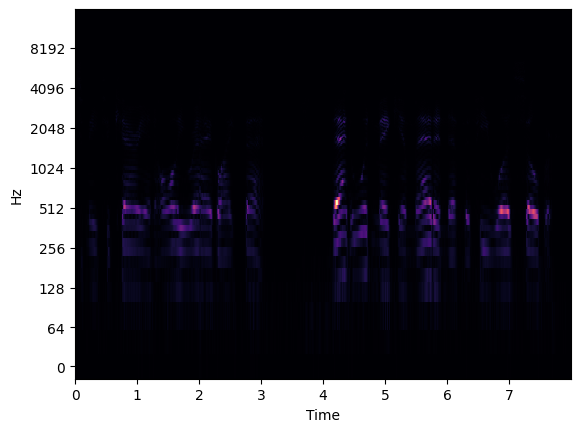

In [29]:
import librosa
print(mono.shape)
print(orig[0,0,:])
mono = mono.permute(1, 2, 0)
print(mono.shape)
mono = torch.view_as_complex(mono)
print(mono.shape)
mono = mono.detach().cpu().numpy()
print(mono.shape)
librosa.display.specshow(mono, sr=32000, x_axis='time', y_axis='log')

torch.Size([2, 400, 500])
torch.Size([400, 500, 2])
tensor([[ 9.3430e-03+0.0000e+00j,  9.6695e-02+0.0000e+00j,
         -1.1209e-01+0.0000e+00j,  ...,
          3.2433e-02+0.0000e+00j, -4.8055e-02+0.0000e+00j,
          2.7414e-02+0.0000e+00j],
        [-1.0309e-02+1.6767e-02j, -5.4768e-02+5.2141e-02j,
          1.6995e-01-8.7709e-02j,  ...,
         -8.0891e-02+5.5176e-02j,  1.9513e-01+7.1022e-02j,
         -3.3155e-02-2.5215e-01j],
        [ 1.2845e-02-5.4777e-02j,  3.2764e-02-6.0912e-02j,
         -2.5722e-01+2.1599e-01j,  ...,
         -4.3040e-02-1.2669e-01j, -2.5131e-01-1.0678e-01j,
          1.5582e-01+4.1413e-01j],
        ...,
        [-1.7020e-04+6.1834e-05j,  1.7086e-06+1.1175e-05j,
          1.5068e-07-1.0311e-07j,  ...,
         -9.1045e-08+1.7433e-08j,  8.3170e-09+5.1639e-08j,
          9.5374e-06+3.5091e-05j],
        [ 1.7195e-04-4.0748e-05j,  6.5481e-06+8.9434e-06j,
          3.0770e-08+6.3710e-08j,  ...,
          1.7328e-08+7.9968e-09j,  2.1490e-09+2.5453e-09j,
     

/tmp/ipykernel_3543/1355616593.py:15: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(orig, sr=32000, x_axis='time', y_axis='log')


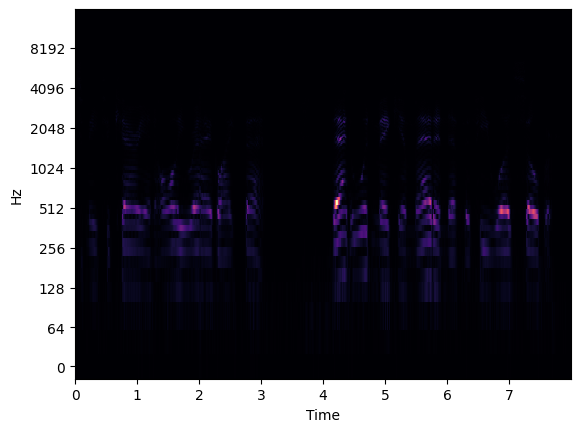

In [43]:
import librosa
import torch
mono, label, right, left, orig = sp[0]
print(orig.shape)

orig = orig.permute(1, 2, 0)
print(orig.shape)
orig = torch.view_as_complex(orig)
print(orig)
print(orig.shape)
orig = orig.detach().cpu().numpy()
print(orig.shape)
# Convert to db
#orig = librosa.amplitude_to_db(orig)
librosa.display.specshow(orig, sr=32000, x_axis='time', y_axis='log')

In [31]:
sp.normalize()

Done normalizing data


torch.Size([2, 400, 500])
tensor([-1.1058e-01,  2.1535e-02,  4.4822e-02, -4.8725e-03, -2.8347e-02,
        -6.6203e-04, -1.1275e-01,  7.6171e-04,  1.0131e-01, -1.2274e-01,
         7.5152e-02,  1.9735e-01,  4.5039e-02, -1.0996e-01, -8.3712e-02,
        -9.0063e-02, -2.4624e-02, -1.1346e-01, -1.3473e-02,  6.2329e-02,
        -4.2405e-02,  8.1377e-02,  1.7427e-02,  4.6342e-02, -9.1909e-02,
         2.2672e-01,  6.5579e-02, -9.2024e-02,  1.9021e-02,  1.4762e-01,
         4.4061e-02, -2.4116e-02, -8.0846e-02,  8.9918e-03, -1.0108e-01,
        -5.5504e-02,  2.0533e-02,  3.8160e-02, -1.1076e-01,  9.5479e-02,
         3.0211e-02, -8.9168e-02,  5.4897e-02, -4.7974e-02, -2.7647e-03,
        -3.6460e-02,  8.5860e-02, -9.6556e-02,  1.1018e-01, -2.7994e-02,
        -1.1851e-01, -8.4948e-02, -5.1935e-02, -4.9108e-03, -2.5526e-02,
        -2.2954e-02, -9.0154e-02, -1.2307e-01, -1.2171e-01, -1.9817e-02,
         1.3961e-01,  6.8214e-02,  7.6507e-02,  7.8007e-02,  4.9040e-01,
         3.7006e-02,  1.9

/tmp/ipykernel_3543/1580291983.py:12: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(mono, sr=32000, x_axis='time', y_axis='log')


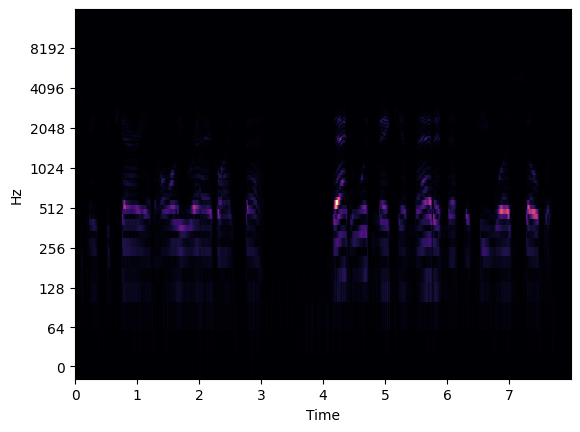

In [32]:
import librosa
mono, label, right, left, orig = sp[0]
print(mono.shape)
# print( first row of mono)
print(mono[0, 0, :])
mono = mono.permute(1, 2, 0)
print(mono.shape)
mono = torch.view_as_complex(mono)
print(mono.shape)
mono = mono.detach().cpu().numpy()
print(mono.shape)
librosa.display.specshow(mono, sr=32000, x_axis='time', y_axis='log')

In [36]:
print(type(mono))
print(type(sp.std_value))
print(type(sp.mean_value))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
<class 'numpy.float64'>


In [50]:
print(mono.shape)
mono = mono.permute(1,2,0)
print(mono.shape)

torch.Size([2, 400, 500])
torch.Size([400, 500, 2])


In [51]:
real_part = mono[:, :, 0]
imag_part = mono[:, :, 1]
print(real_part.shape)
print(imag_part.shape)

# Denormalize real and imaginary parts
denormalized_real_part = (real_part * sp.std_value.numpy()) + sp.mean_value
denormalized_imag_part = (imag_part * sp.std_value.numpy()) + sp.mean_value
print(denormalized_real_part.shape)
print(denormalized_imag_part.shape)
# Combine denormalized real and imaginary parts
back = torch.stack([denormalized_real_part, denormalized_imag_part], dim=-1)

torch.Size([400, 500])
torch.Size([400, 500])
torch.Size([400, 500])
torch.Size([400, 500])


In [52]:
back.shape

torch.Size([400, 500, 2])

In [54]:
back = torch.view_as_complex(back)

In [55]:
'''
tensor([[ 9.3430e-03+0.0000e+00j,  9.6695e-02+0.0000e+00j,
         -1.1209e-01+0.0000e+00j,  ...,
          3.2433e-02+0.0000e+00j, -4.8055e-02+0.0000e+00j,
          2.7414e-02+0.0000e+00j],
        [-1.0309e-02+1.6767e-02j, -5.4768e-02+5.2141e-02j,
          1.6995e-01-8.7709e-02j,  ...,
         -8.0891e-02+5.5176e-02j,  1.9513e-01+7.1022e-02j,
         -3.3155e-02-2.5215e-01j],
        [ 1.2845e-02-5.4777e-02j,  3.2764e-02-6.0912e-02j,
         -2.5722e-01+2.1599e-01j,  ...,
         -4.3040e-02-1.2669e-01j, -2.5131e-01-1.0678e-01j,
          1.5582e-01+4.1413e-01j],
        ...,
        [-1.7020e-04+6.1834e-05j,  1.7086e-06+1.1175e-05j,
          1.5068e-07-1.0311e-07j,  ...,
         -9.1045e-08+1.7433e-08j,  8.3170e-09+5.1639e-08j,
          9.5374e-06+3.5091e-05j],
        [ 1.7195e-04-4.0748e-05j,  6.5481e-06+8.9434e-06j,
          3.0770e-08+6.3710e-08j,  ...,
          1.7328e-08+7.9968e-09j,  2.1490e-09+2.5453e-09j,
         -1.2489e-05+3.4193e-05j],
        [-1.7304e-04+2.0253e-05j,  9.6708e-06+4.9478e-06j,
          4.8005e-08+1.6947e-08j,  ...,
         -2.9789e-08-2.7820e-09j,  1.9481e-08-1.2892e-08j,
         -2.9755e-05+2.0830e-05j]])
'''

back


tensor([[9.3430e-03+0.0000e+00j, 9.6695e-02+0.0000e+00j, 1.1209e-01+0.0000e+00j,
          ..., 3.2433e-02+0.0000e+00j, 4.8055e-02+0.0000e+00j,
         2.7414e-02+0.0000e+00j],
        [1.0309e-02+1.6767e-02j, 5.4768e-02+5.2141e-02j, 1.6995e-01+8.7709e-02j,
          ..., 8.0891e-02+5.5176e-02j, 1.9513e-01+7.1022e-02j,
         3.3155e-02+2.5215e-01j],
        [1.2845e-02+5.4777e-02j, 3.2764e-02+6.0912e-02j, 2.5722e-01+2.1599e-01j,
          ..., 4.3040e-02+1.2669e-01j, 2.5131e-01+1.0678e-01j,
         1.5582e-01+4.1413e-01j],
        ...,
        [1.7020e-04+6.1832e-05j, 1.7062e-06+1.1176e-05j, 1.4901e-07+1.0431e-07j,
          ..., 8.9407e-08+1.4901e-08j, 7.4506e-09+5.2154e-08j,
         9.5367e-06+3.5092e-05j],
        [1.7195e-04+4.0747e-05j, 6.5491e-06+8.9407e-06j, 2.9802e-08+6.7055e-08j,
          ..., 1.4901e-08+7.4506e-09j, 0.0000e+00+0.0000e+00j,
         1.2487e-05+3.4191e-05j],
        [1.7303e-04+2.0251e-05j, 9.6709e-06+4.9472e-06j, 4.4703e-08+1.4901e-08j,
          ..., 2

In [28]:
orig = torch.view_as_complex(orig)

In [29]:
o = orig.cpu().detach().numpy()
o.shape

(400, 500)

/tmp/ipykernel_3436/772352462.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(o, sr=32000, x_axis='time', y_axis='log')


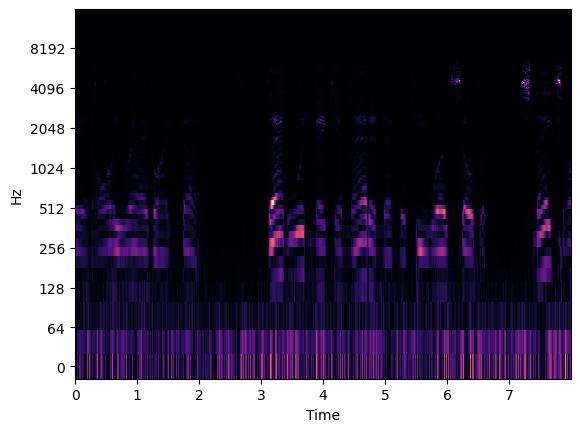

In [30]:
import librosa
librosa.display.specshow(o, sr=32000, x_axis='time', y_axis='log')

AttributeError: 'SpectroDataset' object has no attribute 'std_value'